___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import os

# Set tensorflow log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import tensorflow as tf

#Uncomment the following lines if you want to suppress warnings:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [3]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) `tensorflow` random seed
# 3) `python` random seed
seed = 42
keras.utils.set_random_seed(seed)

# This will make TensorFlow ops as deterministic as possible, but it will
# affect the overall performance, so it's not enabled by default.
# `enable_op_determinism()` is introduced in TensorFlow 2.9.
tf.config.experimental.enable_op_determinism()

In [4]:
# Get python version
!python --version

Python 3.10.13


In [5]:
# Get tensorflow version
tf.__version__

'2.10.1'

In [6]:
# List cuda-capable gpu's that are attached to this session
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


In [7]:
# Get more information about gpu (if available)
if tf.config.list_physical_devices("GPU"):
    !nvidia-smi

Mon Nov 13 17:40:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 527.37       Driver Version: 527.37       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   44C    P8    12W /  N/A |    182MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
df = pd.read_csv("Churn_Modelling.csv")
df_1 = df.copy()

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [10]:
df.shape

(10000, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [13]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

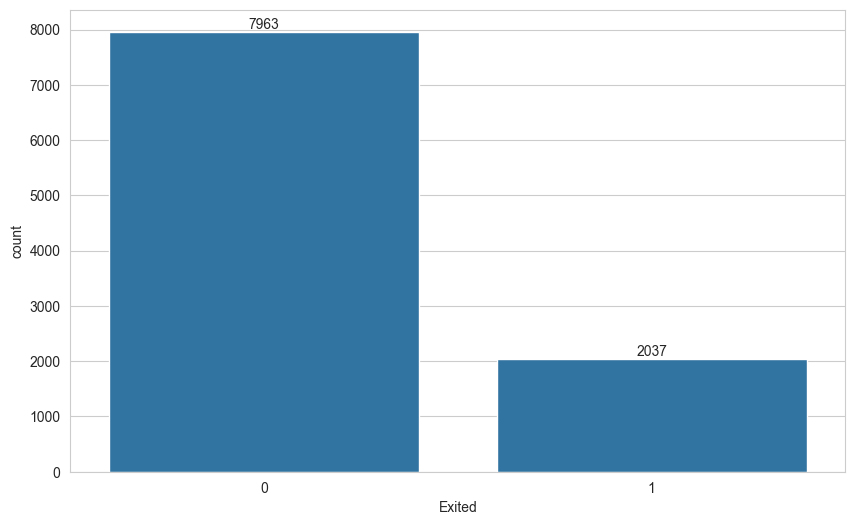

In [14]:
ax = sns.countplot(x=df["Exited"])
ax.bar_label(ax.containers[0]);

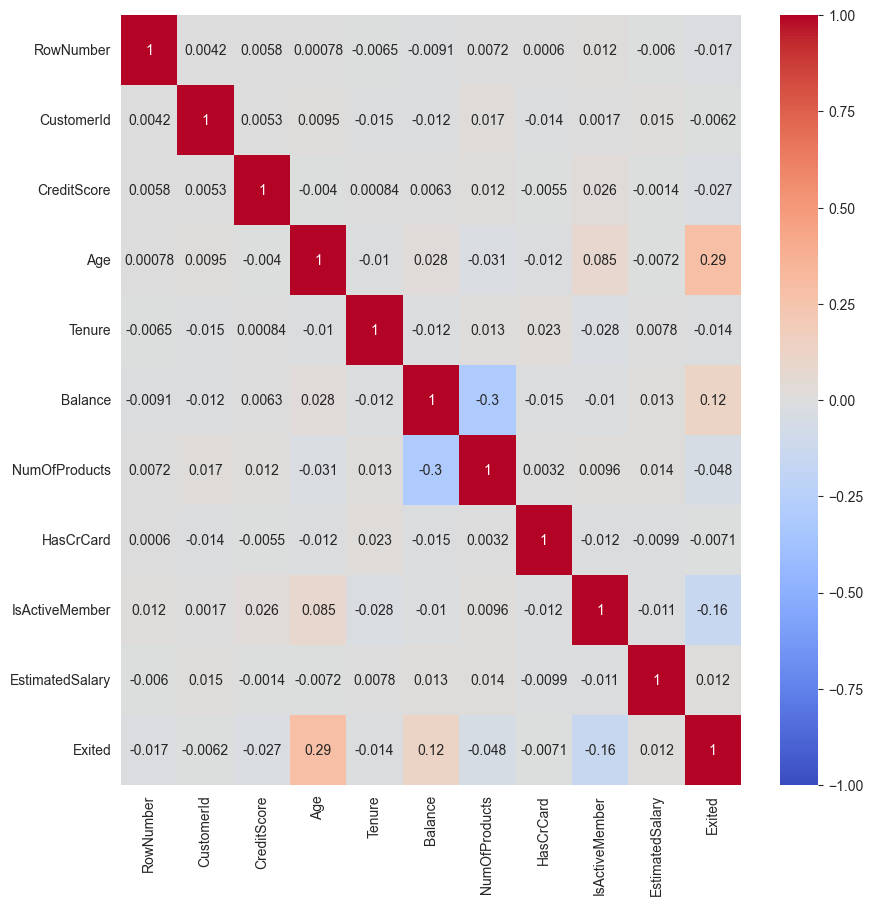

In [15]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

In [16]:
col = list(df.columns)

In [17]:
drop_list = [
    'RowNumber', 'CustomerId', 'Surname' 
]

In [18]:
df = df.drop(drop_list, axis=1)

In [19]:
df.shape

(10000, 11)

In [20]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


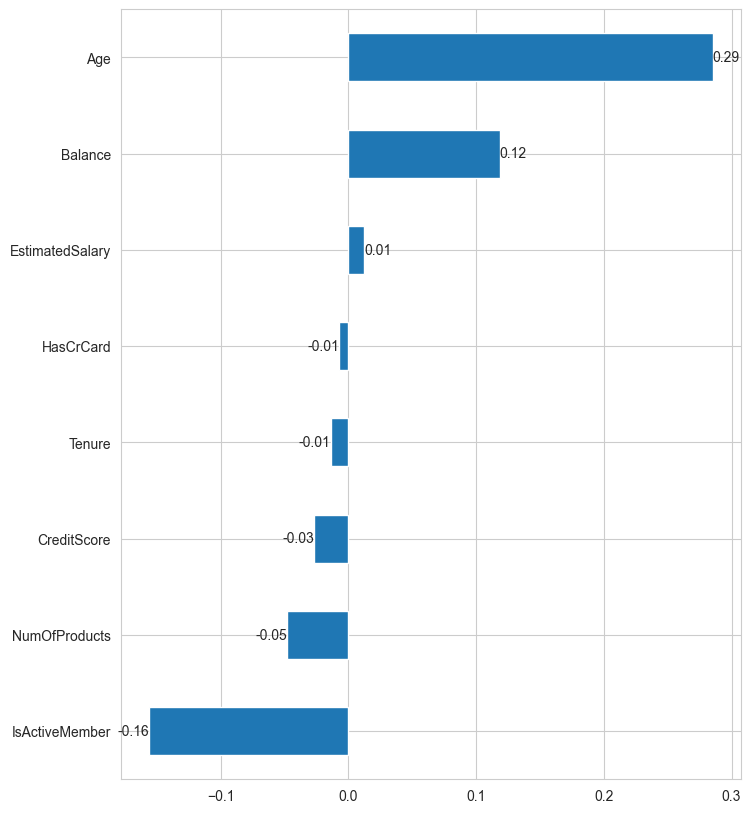

In [21]:
plt.figure(figsize=(8, 10))
ax=df.corr(numeric_only=True)["Exited"].sort_values().drop("Exited").plot(kind="barh")
ax.bar_label(ax.containers[0], fmt="%.2f")
plt.show()

# Preprocessing of Data
- Train | Test Split, Scalling

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [23]:
col

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [35]:
df = pd.get_dummies(df, dtype=float)

In [36]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.10, random_state=seed
)

In [38]:
# validation datasina bolebiliyoruz.

# Modelling & Model Performance

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
#from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam

In [40]:
X_train.shape

(9000, 13)

In [41]:
X_test.shape

(1000, 13)

In [42]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.compose import make_column_transformer

In [43]:
scaler = MinMaxScaler()

In [44]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## without class_weigth

### Create The Model

In [45]:
model = Sequential()

model.add(Dense(15, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [46]:
model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=100, verbose=1,
)

Epoch 1/100
254/254 [==============================] - 3s 4ms/step - loss: 0.6287 - accuracy: 0.7144 - val_loss: 0.4949 - val_accuracy: 0.7989
Epoch 2/100
254/254 [==============================] - 1s 4ms/step - loss: 0.4870 - accuracy: 0.7960 - val_loss: 0.4703 - val_accuracy: 0.7989
Epoch 3/100
254/254 [==============================] - 1s 4ms/step - loss: 0.4711 - accuracy: 0.7980 - val_loss: 0.4477 - val_accuracy: 0.8067
Epoch 4/100
254/254 [==============================] - 1s 4ms/step - loss: 0.4593 - accuracy: 0.8031 - val_loss: 0.4338 - val_accuracy: 0.8111
Epoch 5/100
254/254 [==============================] - 1s 4ms/step - loss: 0.4497 - accuracy: 0.8043 - val_loss: 0.4230 - val_accuracy: 0.8278
Epoch 6/100
254/254 [==============================] - 1s 4ms/step - loss: 0.4396 - accuracy: 0.8110 - val_loss: 0.4097 - val_accuracy: 0.8311
Epoch 7/100
254/254 [==============================] - 1s 4ms/step - loss: 0.4323 - accuracy: 0.8149 - val_loss: 0.4055 - val_accuracy: 0.8378

Epoch 58/100
254/254 [==============================] - 1s 4ms/step - loss: 0.3427 - accuracy: 0.8584 - val_loss: 0.3005 - val_accuracy: 0.8922
Epoch 59/100
254/254 [==============================] - 1s 4ms/step - loss: 0.3426 - accuracy: 0.8599 - val_loss: 0.3029 - val_accuracy: 0.8856
Epoch 60/100
254/254 [==============================] - 1s 4ms/step - loss: 0.3433 - accuracy: 0.8572 - val_loss: 0.2999 - val_accuracy: 0.8878
Epoch 61/100
254/254 [==============================] - 1s 4ms/step - loss: 0.3415 - accuracy: 0.8580 - val_loss: 0.2980 - val_accuracy: 0.8867
Epoch 62/100
254/254 [==============================] - 1s 4ms/step - loss: 0.3412 - accuracy: 0.8589 - val_loss: 0.3000 - val_accuracy: 0.8889
Epoch 63/100
254/254 [==============================] - 1s 4ms/step - loss: 0.3412 - accuracy: 0.8584 - val_loss: 0.3100 - val_accuracy: 0.8989
Epoch 64/100
254/254 [==============================] - 1s 4ms/step - loss: 0.3413 - accuracy: 0.8583 - val_loss: 0.2975 - val_accuracy:

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                210       
                                                                 
 dense_1 (Dense)             (None, 8)                 128       
                                                                 
 dense_2 (Dense)             (None, 5)                 45        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 389
Trainable params: 389
Non-trainable params: 0
_________________________________________________________________


In [48]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.629,0.714,0.495,0.799
1,0.487,0.796,0.470,0.799
2,0.471,0.798,0.448,0.807
3,0.459,0.803,0.434,0.811
4,0.450,0.804,0.423,0.828


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

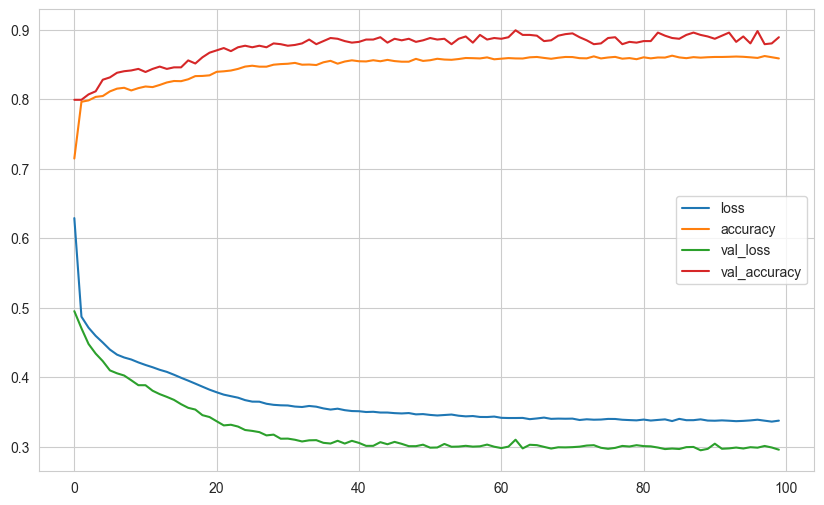

In [49]:
loss_df.plot()
plt.show()

In [50]:
model.evaluate(X_test, y_test, verbose=0)

[0.3396138548851013, 0.8550000190734863]

In [51]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3396138548851013
accuracy:  0.8550000190734863


In [52]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [53]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[762  34]
 [111  93]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.73      0.46      0.56       204

    accuracy                           0.85      1000
   macro avg       0.80      0.71      0.74      1000
weighted avg       0.84      0.85      0.84      1000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [54]:
from tensorflow.keras.optimizers import Adam

In [55]:
model = Sequential()

model.add(Dense(15, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [56]:
model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=100, verbose=1,
)

Epoch 1/100
254/254 [==============================] - 2s 5ms/step - loss: 0.5144 - accuracy: 0.7763 - val_loss: 0.4484 - val_accuracy: 0.7989
Epoch 2/100
254/254 [==============================] - 1s 4ms/step - loss: 0.4488 - accuracy: 0.8002 - val_loss: 0.4168 - val_accuracy: 0.8133
Epoch 3/100
254/254 [==============================] - 1s 4ms/step - loss: 0.4259 - accuracy: 0.8172 - val_loss: 0.3711 - val_accuracy: 0.8544
Epoch 4/100
254/254 [==============================] - 1s 4ms/step - loss: 0.3871 - accuracy: 0.8426 - val_loss: 0.3320 - val_accuracy: 0.8789
Epoch 5/100
254/254 [==============================] - 1s 4ms/step - loss: 0.3677 - accuracy: 0.8493 - val_loss: 0.3337 - val_accuracy: 0.8689
Epoch 6/100
254/254 [==============================] - 1s 4ms/step - loss: 0.3661 - accuracy: 0.8509 - val_loss: 0.3136 - val_accuracy: 0.8822
Epoch 7/100
254/254 [==============================] - 1s 4ms/step - loss: 0.3603 - accuracy: 0.8520 - val_loss: 0.3124 - val_accuracy: 0.8856

Epoch 58/100
254/254 [==============================] - 1s 4ms/step - loss: 0.3403 - accuracy: 0.8595 - val_loss: 0.2964 - val_accuracy: 0.8889
Epoch 59/100
254/254 [==============================] - 1s 5ms/step - loss: 0.3407 - accuracy: 0.8607 - val_loss: 0.3037 - val_accuracy: 0.8800
Epoch 60/100
254/254 [==============================] - 1s 4ms/step - loss: 0.3423 - accuracy: 0.8589 - val_loss: 0.3013 - val_accuracy: 0.8844
Epoch 61/100
254/254 [==============================] - 1s 4ms/step - loss: 0.3381 - accuracy: 0.8615 - val_loss: 0.2882 - val_accuracy: 0.8833
Epoch 62/100
254/254 [==============================] - 1s 4ms/step - loss: 0.3401 - accuracy: 0.8609 - val_loss: 0.2888 - val_accuracy: 0.8844
Epoch 63/100
254/254 [==============================] - 1s 4ms/step - loss: 0.3392 - accuracy: 0.8595 - val_loss: 0.3009 - val_accuracy: 0.8867
Epoch 64/100
254/254 [==============================] - 1s 4ms/step - loss: 0.3407 - accuracy: 0.8598 - val_loss: 0.2880 - val_accuracy:

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 15)                210       
                                                                 
 dense_5 (Dense)             (None, 8)                 128       
                                                                 
 dense_6 (Dense)             (None, 5)                 45        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 389
Trainable params: 389
Non-trainable params: 0
_________________________________________________________________


In [58]:
X_train.shape

(9000, 13)

In [59]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.514,0.776,0.448,0.799
1,0.449,0.800,0.417,0.813
2,0.426,0.817,0.371,0.854
3,0.387,0.843,0.332,0.879
4,0.368,0.849,0.334,0.869


In [60]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.34659871459007263
accuracy:  0.8560000061988831


In [61]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[760  36]
 [108  96]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       796
           1       0.73      0.47      0.57       204

    accuracy                           0.86      1000
   macro avg       0.80      0.71      0.74      1000
weighted avg       0.85      0.86      0.84      1000



### Add Dropout Layer

In [62]:
from tensorflow.keras.layers import Dropout

In [63]:
model = Sequential()

model.add(Dense(40, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(26, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [64]:
model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=100, verbose=1,
)

Epoch 1/100
254/254 [==============================] - 2s 6ms/step - loss: 0.5428 - accuracy: 0.7862 - val_loss: 0.4969 - val_accuracy: 0.7989
Epoch 2/100
254/254 [==============================] - 1s 5ms/step - loss: 0.5092 - accuracy: 0.7957 - val_loss: 0.4859 - val_accuracy: 0.7989
Epoch 3/100
254/254 [==============================] - 1s 4ms/step - loss: 0.4986 - accuracy: 0.7960 - val_loss: 0.4664 - val_accuracy: 0.7989
Epoch 4/100
254/254 [==============================] - 1s 5ms/step - loss: 0.4910 - accuracy: 0.7960 - val_loss: 0.4647 - val_accuracy: 0.7989
Epoch 5/100
254/254 [==============================] - 1s 4ms/step - loss: 0.4815 - accuracy: 0.7960 - val_loss: 0.4606 - val_accuracy: 0.7989
Epoch 6/100
254/254 [==============================] - 1s 5ms/step - loss: 0.4761 - accuracy: 0.7960 - val_loss: 0.4455 - val_accuracy: 0.7989
Epoch 7/100
254/254 [==============================] - 1s 4ms/step - loss: 0.4739 - accuracy: 0.7960 - val_loss: 0.4514 - val_accuracy: 0.7989

Epoch 58/100
254/254 [==============================] - 1s 5ms/step - loss: 0.4100 - accuracy: 0.8293 - val_loss: 0.3368 - val_accuracy: 0.8744
Epoch 59/100
254/254 [==============================] - 1s 5ms/step - loss: 0.4056 - accuracy: 0.8333 - val_loss: 0.3421 - val_accuracy: 0.8822
Epoch 60/100
254/254 [==============================] - 1s 5ms/step - loss: 0.4045 - accuracy: 0.8300 - val_loss: 0.3407 - val_accuracy: 0.8778
Epoch 61/100
254/254 [==============================] - 1s 5ms/step - loss: 0.4080 - accuracy: 0.8291 - val_loss: 0.3378 - val_accuracy: 0.8778
Epoch 62/100
254/254 [==============================] - 1s 4ms/step - loss: 0.4028 - accuracy: 0.8356 - val_loss: 0.3429 - val_accuracy: 0.8811
Epoch 63/100
254/254 [==============================] - 1s 4ms/step - loss: 0.4026 - accuracy: 0.8356 - val_loss: 0.3434 - val_accuracy: 0.8811
Epoch 64/100
254/254 [==============================] - 1s 4ms/step - loss: 0.4125 - accuracy: 0.8288 - val_loss: 0.3499 - val_accuracy:

<Axes: >

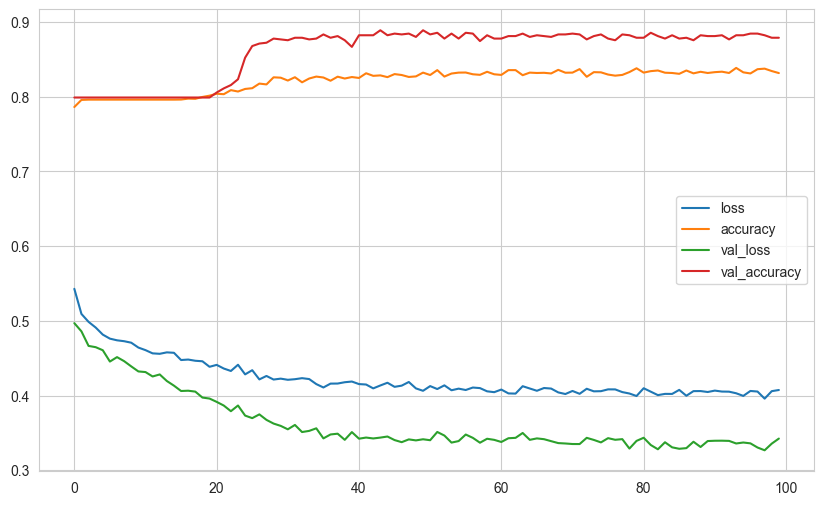

In [65]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [66]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3747463524341583
accuracy:  0.8519999980926514


In [67]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[775  21]
 [127  77]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       796
           1       0.79      0.38      0.51       204

    accuracy                           0.85      1000
   macro avg       0.82      0.68      0.71      1000
weighted avg       0.84      0.85      0.83      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [68]:
from tensorflow.keras.callbacks import EarlyStopping

In [69]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [70]:
model = Sequential()

model.add(Dense(64, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [71]:
model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=32,
    epochs=1000,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/1000
254/254 [==============================] - 2s 5ms/step - loss: 0.4890 - accuracy: 0.7941 - val_loss: 0.4385 - val_accuracy: 0.8044
Epoch 2/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.4409 - accuracy: 0.8079 - val_loss: 0.4121 - val_accuracy: 0.8200
Epoch 3/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.4229 - accuracy: 0.8181 - val_loss: 0.3794 - val_accuracy: 0.8456
Epoch 4/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.4054 - accuracy: 0.8270 - val_loss: 0.3560 - val_accuracy: 0.8533
Epoch 5/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.3860 - accuracy: 0.8356 - val_loss: 0.3346 - val_accuracy: 0.8656
Epoch 6/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.3713 - accuracy: 0.8430 - val_loss: 0.3176 - val_accuracy: 0.8767
Epoch 7/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.3605 - accuracy: 0.8499 - val_loss: 0.3091 - val_accuracy:

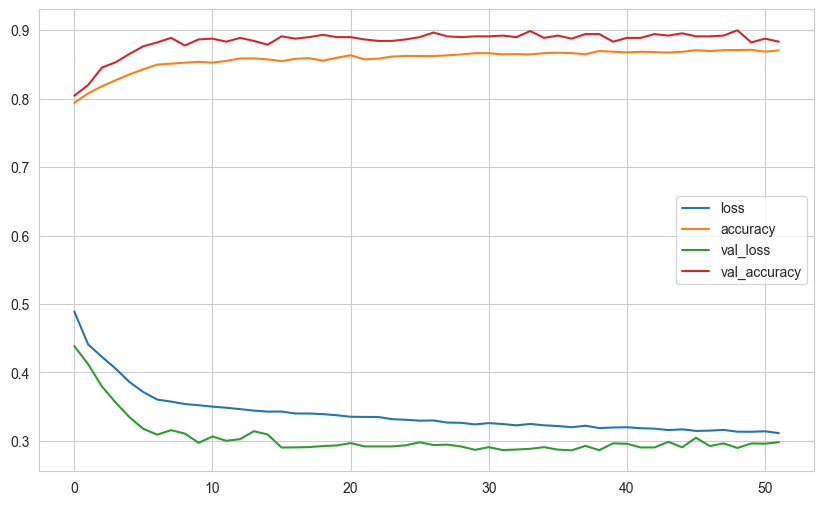

In [72]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [73]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3427389860153198
accuracy:  0.859000027179718


In [74]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[764  32]
 [109  95]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.75      0.47      0.57       204

    accuracy                           0.86      1000
   macro avg       0.81      0.71      0.74      1000
weighted avg       0.85      0.86      0.85      1000



#### Monitor the "val_recall" as metric

In [75]:
early_stop = EarlyStopping(
    monitor="val_recall", mode="min", verbose=1, patience=30, restore_best_weights=True
)

In [76]:
model = Sequential()

model.add(Dense(64, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [77]:
model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=32,
    epochs=1000,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/1000
254/254 [==============================] - 2s 5ms/step - loss: 0.4818 - recall: 0.0151 - val_loss: 0.4333 - val_recall: 0.1602
Epoch 2/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.4373 - recall: 0.1786 - val_loss: 0.4066 - val_recall: 0.1934
Epoch 3/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.4170 - recall: 0.2609 - val_loss: 0.3727 - val_recall: 0.3260
Epoch 4/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.3906 - recall: 0.3323 - val_loss: 0.3319 - val_recall: 0.4807
Epoch 5/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.3658 - recall: 0.3904 - val_loss: 0.3161 - val_recall: 0.4696
Epoch 6/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.3594 - recall: 0.4098 - val_loss: 0.3060 - val_recall: 0.5249
Epoch 7/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.3530 - recall: 0.4268 - val_loss: 0.3061 - val_recall: 0.4751
Epoch 8/1000
254/254

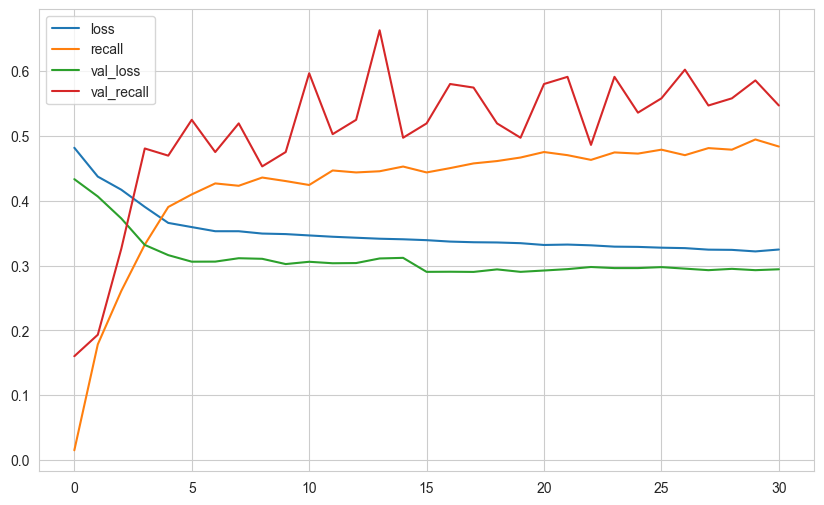

In [78]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [79]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.45752227306365967
accuracy:  0.11764705926179886


In [80]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[775  21]
 [180  24]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.89       796
           1       0.53      0.12      0.19       204

    accuracy                           0.80      1000
   macro avg       0.67      0.55      0.54      1000
weighted avg       0.75      0.80      0.74      1000



## Optuna

In [81]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [82]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [83]:
trial_metric = "accuracy"
batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [84]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-11-13 17:49:22,570] A new study created in memory with name: no-name-88d71ea8-40cf-403c-a7a0-843f32555a30


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-11-13 17:49:38,315] Trial 0 finished with value: 0.7960000038146973 and parameters: {'n_units1': 83, 'n_units2': 88, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 2.4650329301018057e-05, 'w0': 0.9378389312181445, 'w1': 0.012550200779604753}. Best is trial 0 with value: 0.7960000038146973.


Restoring model weights from the end of the best epoch: 20.
Epoch 35: early stopping


[I 2023-11-13 17:49:56,478] Trial 1 finished with value: 0.8360000252723694 and parameters: {'n_units1': 77, 'n_units2': 88, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.022075051795981356, 'w0': 0.1727707970161992, 'w1': 0.031016780996307912}. Best is trial 1 with value: 0.8360000252723694.


Restoring model weights from the end of the best epoch: 20.
Epoch 35: early stopping


[I 2023-11-13 17:50:17,828] Trial 2 finished with value: 0.8259999752044678 and parameters: {'n_units1': 108, 'n_units2': 64, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.005170630865710788, 'w0': 0.27686495949108825, 'w1': 0.016480543048359268}. Best is trial 1 with value: 0.8360000252723694.


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-11-13 17:50:28,789] Trial 3 finished with value: 0.7960000038146973 and parameters: {'n_units1': 86, 'n_units2': 93, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.007687890409940046, 'w0': 2.45275016876558, 'w1': 0.01757087725308281}. Best is trial 1 with value: 0.8360000252723694.


Restoring model weights from the end of the best epoch: 19.
Epoch 34: early stopping


[I 2023-11-13 17:50:50,346] Trial 4 finished with value: 0.8339999914169312 and parameters: {'n_units1': 80, 'n_units2': 96, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.009104590733573436, 'w0': 1.1385593516641097, 'w1': 0.05871864500657379}. Best is trial 1 with value: 0.8360000252723694.


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-11-13 17:51:11,603] Trial 5 finished with value: 0.20399999618530273 and parameters: {'n_units1': 36, 'n_units2': 73, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.026526959607563835, 'w0': 0.013358454636517865, 'w1': 1.8627800500568585}. Best is trial 1 with value: 0.8360000252723694.
[I 2023-11-13 17:52:02,745] Trial 6 finished with value: 0.7770000100135803 and parameters: {'n_units1': 93, 'n_units2': 46, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 1.261158215836293e-05, 'w0': 0.06566120693438605, 'w1': 0.011151905916557715}. Best is trial 1 with value: 0.8360000252723694.


Restoring model weights from the end of the best epoch: 30.
Epoch 45: early stopping


[I 2023-11-13 17:52:44,632] Trial 7 finished with value: 0.8529999852180481 and parameters: {'n_units1': 35, 'n_units2': 83, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.0013814299804255777, 'w0': 0.017438233614250866, 'w1': 0.017405636263550035}. Best is trial 7 with value: 0.8529999852180481.
[I 2023-11-13 17:53:36,939] Trial 8 finished with value: 0.7960000038146973 and parameters: {'n_units1': 66, 'n_units2': 85, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.0020244039900091785, 'w0': 0.03863253185434787, 'w1': 0.011171977957434064}. Best is trial 7 with value: 0.8529999852180481.


Restoring model weights from the end of the best epoch: 82.
Epoch 97: early stopping


[I 2023-11-13 17:54:59,634] Trial 9 finished with value: 0.7960000038146973 and parameters: {'n_units1': 20, 'n_units2': 13, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.0025434961817212545, 'w0': 0.07966476052419852, 'w1': 0.012454544111014088}. Best is trial 7 with value: 0.8529999852180481.


{'n_units1': 35,
 'n_units2': 83,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam,
 'learning_rate': 0.0013814299804255777,
 'w0': 0.017438233614250866,
 'w1': 0.017405636263550035}

In [85]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=64,
    epochs=1000,
    callbacks=[early_stop],
    verbose=1,class_weight={0: w0, 1: w1}
)

Epoch 1/1000
127/127 [==============================] - 1s 7ms/step - loss: 0.4913 - recall: 0.0000e+00 - val_loss: 0.4451 - val_recall: 0.0166
Epoch 2/1000
127/127 [==============================] - 1s 4ms/step - loss: 0.4501 - recall: 0.0811 - val_loss: 0.4214 - val_recall: 0.1381
Epoch 3/1000
127/127 [==============================] - 1s 5ms/step - loss: 0.4273 - recall: 0.1840 - val_loss: 0.3953 - val_recall: 0.2983
Epoch 4/1000
127/127 [==============================] - 1s 4ms/step - loss: 0.4089 - recall: 0.2609 - val_loss: 0.3767 - val_recall: 0.4033
Epoch 5/1000
127/127 [==============================] - 1s 4ms/step - loss: 0.3946 - recall: 0.3087 - val_loss: 0.3553 - val_recall: 0.3591
Epoch 6/1000
127/127 [==============================] - 1s 4ms/step - loss: 0.3769 - recall: 0.3481 - val_loss: 0.3421 - val_recall: 0.4641
Epoch 7/1000
127/127 [==============================] - 1s 4ms/step - loss: 0.3669 - recall: 0.3892 - val_loss: 0.3266 - val_recall: 0.4309
Epoch 8/1000
127

Epoch 58: early stopping


In [86]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[763  33]
 [105  99]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.75      0.49      0.59       204

    accuracy                           0.86      1000
   macro avg       0.81      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [87]:
history = model.history.history

In [88]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[763  33]
 [105  99]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.75      0.49      0.59       204

    accuracy                           0.86      1000
   macro avg       0.81      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



32/32 [==============================] - 0s 1ms/step


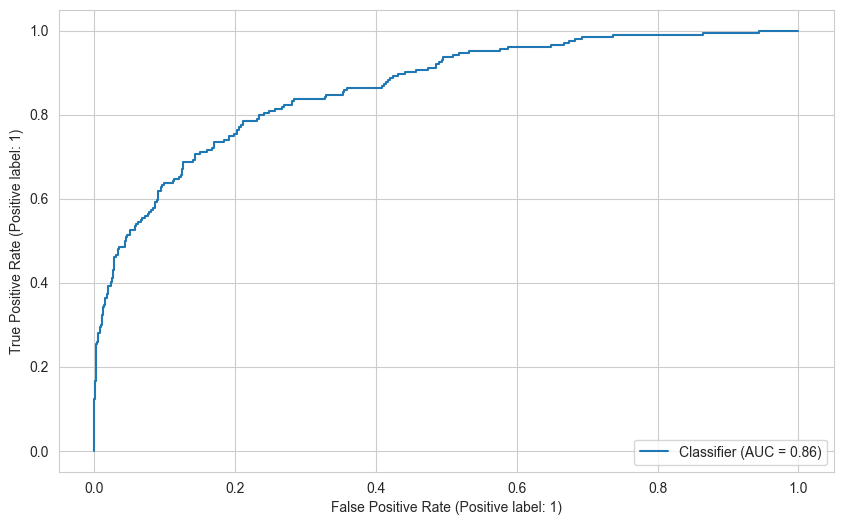

In [89]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [90]:
roc_auc_score(y_test, y_pred_proba)

0.8630160606956351

# Final Model and Model Deployment

In [91]:
import pickle

pickle.dump(scaler, open("scaler_cancer", "wb"))

In [92]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.33696624636650085
accuracy:  0.4852941036224365


In [93]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[763  33]
 [105  99]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.75      0.49      0.59       204

    accuracy                           0.86      1000
   macro avg       0.81      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



In [94]:
import pickle

pickle.dump(scaler, open("scaler_churn_customer", "wb"))

In [95]:
model.save("model_churn.h5")

In [96]:
from tensorflow.keras.models import load_model

In [97]:
model_churn = load_model("model_churn.h5")

In [98]:
scaler_churn_customer = pickle.load(open("scaler_churn_customer", "rb"))

## Prediction

In [103]:
single_customer = df.drop("Exited", axis = 1).iloc[49:50, :]
single_customer

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
49,776,37,2,103769.220,2,1,0,194099.120,0.000,1.000,0.000,1.000,0.000


In [104]:
single_customer = scaler_churn_customer.transform(single_customer)
single_customer

array([[0.852     , 0.25675676, 0.2       , 0.43529629, 0.33333333,
        1.        , 0.        , 0.97053039, 0.        , 1.        ,
        0.        , 1.        , 0.        ]])

In [107]:
(model_churn.predict(single_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 61ms/step


array([[0]])

In [116]:
df["Exited"].iloc[49:50]

49    0
Name: Exited, dtype: int64

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___